### **Exercise: Game of Life (no xarray, just python practice)**

Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data.
Neighbours are defined as adjacent cells (all the 8).

 - Any LIVING cell with 2 or 3 neighbours survives.
 - Any DEAD cell with 3 neighbours comes alive.
 - Any OTHER LIVING cell dies.
 - All deaths and births occur simultaneously

So, at each step you need:

 - calculate the number of neighnours
 - set "dead" or "alive" status according to the above
 - plot

### Hints and directions:

*Implement everything in a class*.

For initial conditions: two files "ships.txt" and "guns.txt" are provided in data folder (but feel free to create your own if you wish), you can read them like

```python
field=np.genfromtxt("ships.txt").transpose()
```

For plotting: Jupyter is very finicky with "real-time" plots and there is a high chance it will refuse to plot everything in one frame even if you try all the stackoverflow solutions, so I propose just using a script to run your program. Try the following code to produce "animation" to test that it works:

```python
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.5)
plt.show()

```

In [8]:
from matplotlib.animation import FuncAnimation

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class GameOfLife:
    def __init__(self, initial_state):
        self.grid = initial_state

    def count_neighbors(self, x, y):
        neighbors = [
            self.grid[x-1, y-1], self.grid[x-1, y], self.grid[x-1, y+1],
            self.grid[x, y-1],                     self.grid[x, y+1],
            self.grid[x+1, y-1], self.grid[x+1, y], self.grid[x+1, y+1]
        ]
        return np.sum(neighbors)

    def update(self):
        new_grid = self.grid.copy()

        for i in range(1, self.grid.shape[0] - 1):
            for j in range(1, self.grid.shape[1] - 1):
                count = self.count_neighbors(i, j)

                # Apply Conway's Game of Life rules
                if self.grid[i, j] == 1:  # Living cell
                    if count not in [2, 3]:
                        new_grid[i, j] = 0  # Dies
                elif count == 3:
                    new_grid[i, j] = 1  # Comes alive

        self.grid = new_grid

    def plot(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.show()


# Create the GameOfLife instance with the 10 by 10 initial state



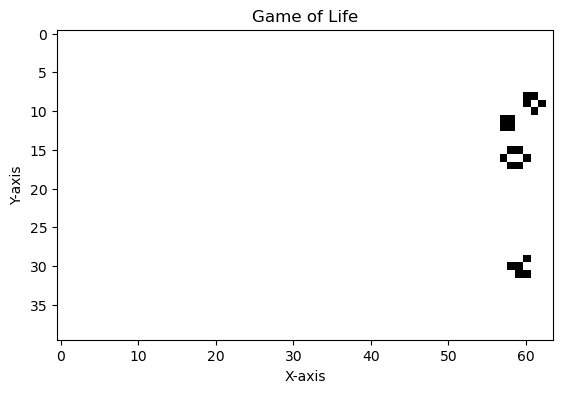

In [24]:
from matplotlib.animation import FuncAnimation

def generate_binary_matrix(N):
    return np.random.choice([0, 1], size=(N, N))

# Specify the size of the matrix (replace 5 with your desired size)
N = 20

# Generate the NxN binary matrix
initial_state = np.genfromtxt("data/ships.txt").transpose()


def update(frame):
    #old = laplace_solver.grid
    gol.update()
    im.set_array(gol.grid)
    return [im]

gol = GameOfLife(initial_state)

fig, ax = plt.subplots()  
im = ax.imshow(gol.grid, cmap='binary', interpolation='nearest')
ax.set_title('Game of Life')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set up the animation
animation = FuncAnimation(fig, update, frames=range(100), interval=2, blit=True)

# Save the animation as a GIF
animation.save('GOL.gif', writer='pillow')

# Display the animation in the Jupyter Notebook
#html_output = HTML(animation.to_jshtml())
#display(html_output)